In [3]:
import json
import networkx as nx
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

with open('graph.json') as f:
    data = json.load(f)

G = nx.node_link_graph(data)

print("Computing centrality measures...")
closeness = nx.closeness_centrality(G)
betweenness = nx.betweenness_centrality(G, normalized=True)
eigenvector = nx.eigenvector_centrality(G, max_iter=1000, tol=1e-6)
degree_centrality = nx.degree_centrality(G)

# Normalize to lie in betn [0, 1]

def normalize(x):
    x = np.array(list(x.values()))
    return (x - x.min()) / (x.max() - x.min())

closeness_norm = normalize(closeness)
betweenness_norm = normalize(betweenness)
eigenvector_norm = normalize(eigenvector)
degree_norm = normalize(degree_centrality)
X = np.vstack([closeness_norm, betweenness_norm, eigenvector_norm,degree_norm]).T

X_scaled = StandardScaler().fit_transform(X)
pca = PCA(n_components=1)
pca.fit(X_scaled)
weights = pca.components_[0]
weights /= np.sum(np.abs(weights))  

combined_scores = X_scaled @ weights

node_ids = list(G.nodes())
sorted_indices = np.argsort(combined_scores)[::-1]  
top_10_indices = sorted_indices[:10]
top_10_nodes = [node_ids[i] for i in top_10_indices]
top_10_scores = combined_scores[top_10_indices]

print("\nOptimal weights (Closeness, Betweenness, Eigenvector):", np.round(weights, 3))
print("\nTop 10 most central nodes:")
for node, score in zip(top_10_nodes, top_10_scores):
    print(f"Node {node}: Combined Score = {score/10:.4f}")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/networkx/readwrite/json_graph/node_link.py:287: FutureWarning: 
The default value will be changed to `edges="edges" in NetworkX 3.6.

To make this warning go away, explicitly set the edges kwarg, e.g.:

  nx.node_link_graph(data, edges="links") to preserve current behavior, or
  nx.node_link_graph(data, edges="edges") for forward compatibility.
  warnings.warn(


Computing centrality measures...

Optimal weights (Closeness, Betweenness, Eigenvector): [0.289 0.311 0.161 0.238]

Top 10 most central nodes:
Node 994: Combined Score = 0.4916
Node 804: Combined Score = 0.4686
Node 669: Combined Score = 0.4422
Node 193: Combined Score = 0.3949
Node 840: Combined Score = 0.3842
Node 777: Combined Score = 0.3662
Node 330: Combined Score = 0.3428
Node 908: Combined Score = 0.3361
Node 907: Combined Score = 0.3335
Node 16: Combined Score = 0.2688


Using the normalized values to get the updated weights in PCA 

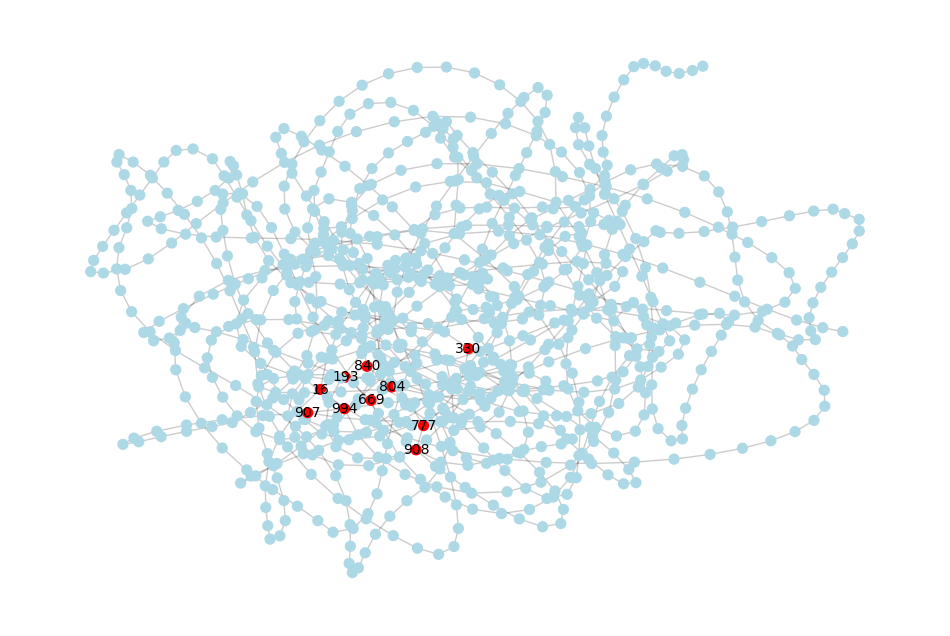

In [5]:
import matplotlib.pyplot as plt

node_colors = []
for node in G.nodes():
    if node in top_10_nodes:
        node_colors.append('red') 
    else:
        node_colors.append('lightblue')  


plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42) 
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=50)
nx.draw_networkx_edges(G, pos, alpha=0.2)


labels = {node: str(node) for node in top_10_nodes}
nx.draw_networkx_labels(G, pos, labels, font_size=10, font_color='black')


plt.axis('off')  # Turn off axis
plt.show()